<a href="https://colab.research.google.com/github/crpytoscooby/College/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [3]:
#load data set
dataset= pd.read_csv("/content/Mall_Customers.csv")

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Extracting Annual income and spending score
X = dataset.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**PART A** - K Means 

In [8]:
from sklearn.cluster import KMeans

In [9]:
#Training the model on datasetset
kmeans = KMeans(n_clusters=6)
y_predict= kmeans.fit_predict(X)
y_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 5, 0, 5, 2, 5, 2, 5,
       0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

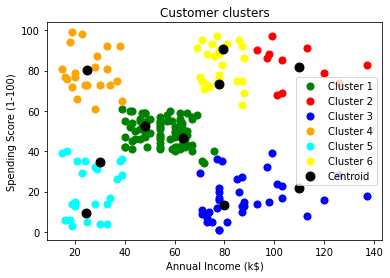

In [11]:
#Visualizing the clusters
import matplotlib.pyplot as mtp
mtp.scatter(X[y_predict == 0,0], X[y_predict == 0,1], s = 50, c = 'green', label = 'Cluster 1')
mtp.scatter(X[y_predict == 1,0], X[y_predict == 1,1], s = 50, c = 'red', label = 'Cluster 2')
mtp.scatter(X[y_predict == 2,0], X[y_predict == 2,1], s = 50, c = 'blue', label = 'Cluster 3')
mtp.scatter(X[y_predict == 3,0], X[y_predict == 3,1], s = 50, c = 'orange', label = 'Cluster 4')
mtp.scatter(X[y_predict == 4,0], X[y_predict == 4,1], s = 50, c = 'cyan', label = 'Cluster 5')
mtp.scatter(X[y_predict == 5,0], X[y_predict == 5,1], s = 50, c = 'yellow', label = 'Cluster 6')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroid')
mtp.title('Customer clusters')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

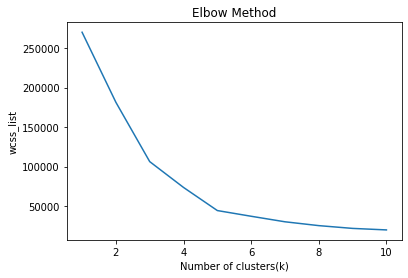

In [12]:
#Elbow Method
#Within-Cluster-Sum-of-Squares (WCSS)
wcss_list= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(X)
  wcss_list.append(kmeans.inertia_)
mtp.plot(range(1,11),wcss_list)
mtp.title('Elbow Method')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

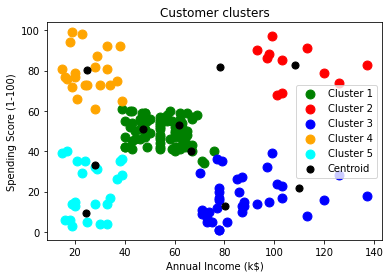

In [13]:
#Visualizing the clusters
mtp.scatter(X[y_predict == 0,0], X[y_predict == 0,1], s = 80, c = 'green', label = 'Cluster 1')
mtp.scatter(X[y_predict == 1,0], X[y_predict == 1,1], s = 80, c = 'red', label = 'Cluster 2')
mtp.scatter(X[y_predict == 2,0], X[y_predict == 2,1], s = 80, c = 'blue', label = 'Cluster 3')
mtp.scatter(X[y_predict == 3,0], X[y_predict == 3,1], s = 80, c = 'orange', label = 'Cluster 4')
mtp.scatter(X[y_predict == 4,0], X[y_predict == 4,1], s = 80, c = 'cyan', label = 'Cluster 5')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroid')
mtp.title('Customer clusters')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

**PART B** - Agglomerative Clustering

In [14]:
#Training the Hierarchical Model
from sklearn.cluster import AgglomerativeClustering
hm= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred= hm.fit_predict(X)

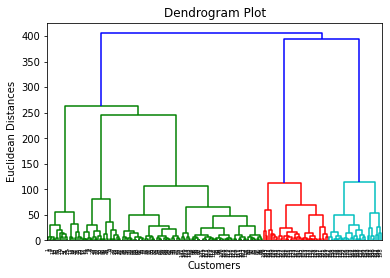

In [15]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
mtp.title("Dendrogram Plot")
mtp.ylabel("Euclidean Distances")
mtp.xlabel("Customers")
mtp.show()

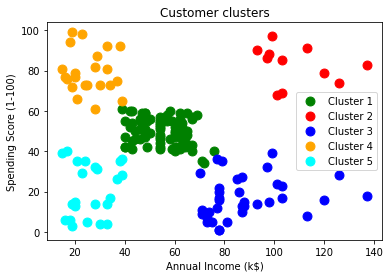

In [16]:
#Visualizing the clusters
mtp.scatter(X[y_predict == 0,0], X[y_predict == 0,1], s = 80, c = 'green', label = 'Cluster 1')
mtp.scatter(X[y_predict == 1,0], X[y_predict == 1,1], s = 80, c = 'red', label = 'Cluster 2')
mtp.scatter(X[y_predict == 2,0], X[y_predict == 2,1], s = 80, c = 'blue', label = 'Cluster 3')
mtp.scatter(X[y_predict == 3,0], X[y_predict == 3,1], s = 80, c = 'orange', label = 'Cluster 4')
mtp.scatter(X[y_predict == 4,0], X[y_predict == 4,1], s = 80, c = 'cyan', label = 'Cluster 5')
mtp.title('Customer clusters')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()